# Tarea 1: Reconocimiento de Patrones en Minería de Datos

* Monserrat Figueroa
* Sebastián Ramirez
* Ignacio Loayza campos

# Dataset: Spiral

En esta ocasión se trabajará con un dataset con dos dimensiones que asimila una espiral con tres brazos.
Para poder explorar de mejor forma los resultados de los algoritmos se implementaron varias funciones auxiliares para reducir la carga visual de código en este notebook, los métodos mencionados pueden ser encontrados en el script anexo `train_benchmark.py`.

Para cada algoritmo se implementa primero un widget que permite explorar visualmente el comportamiento del algoritmo bajo distintos valores de sus parámetros, luego, se ejecuta una búsqueda exhaustiva sobre determinados rangos de parámetros para cada algoritmo, la función objetivo a maximizar es el Silhouette Score. Finalmente, se reporta la mejor combinación de parámetros encontrada y el silhouette score correspondiente junto con el gráfico de dicho modelo.


**Nota técnica:** Para el entrenamiento de algunos algoritmos se está utilizando el backend de joblib configurado para utilizar todos los núcleos disponibles para agilizar el proceso de entrenamiento.

La mayor complicación a la hora de definir el rendimiento de un algoritmo de clustering es el _"cómo"_ definir un buen cluster, en esta ocasión, utilizaremos dos formas, la maximización del silhouette score y la inspección simple sobre los resultados del algoritmo.

Para efectos prácticos, dada la naturaleza del dataset, fijaremos el objetivo de clustering a _"ser capaz de identificar los tres brazos que componen la espiral de como clusters distintos"_, la razón de proponer esta meta es estudiar la **efectividad de los algoritmos a la hora de detectar patrones en los datos**, no simplemente agrupar por densidad o proximidad.


--------
# Detalle de resultados de cada modelo

In [1]:
# General purpose
import numpy as np
import pandas as pd

# Graphical
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

# Seed
seed = 15051991 # My birthday because I love myself <3

# Joblib backend
from joblib import parallel_backend

# Sklearn
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, MeanShift, SpectralClustering
from sklearn.metrics import silhouette_score, make_scorer

# Fuzzy clustering
from skfuzzy.cluster import cmeans, cmeans_predict

# Utility function to create the benchmark for each model
from train_benchmark import *

import warnings
warnings.filterwarnings('ignore')

Data shape: (312, 2)


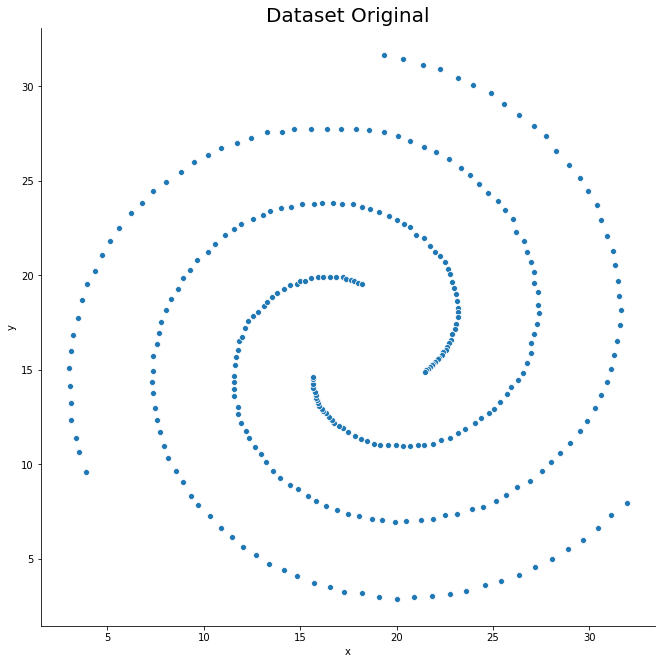

In [2]:
# Data import
df = pd.read_table('spiral.txt', names=['x','y'])
print('Data shape: {}'.format(df.shape))
fig, ax = plt.subplots(figsize=(11, 11))
sn.despine()
plt.title('Dataset Original', size = 20)
sn.scatterplot(x = df.x, y = df.y);

## K-Means

In [3]:
#grid_kmeans = {'n_clusters':5}
clusters = {'n_clusters':range(1,5)}
interact(plot_cluster_interactive, data = fixed(df), estimator = fixed(KMeans), n_clusters = (1, 100, 4));



interactive(children=(IntSlider(value=49, description='n_clusters', min=1, step=4), Output()), _dom_classes=('…

### Maximización de Silhouette Score

############### K-Means ###############
Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done 221 tasks      | elapsed:   42.7s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   55.0s finished


		 Silhouette Score: 0.20977194778385644
		 Nº Clusters: 195


<Figure size 864x864 with 0 Axes>

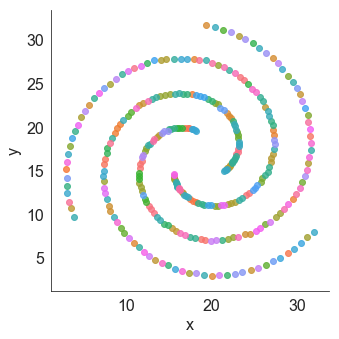

In [7]:
grid_kmeans = {'n_clusters':np.linspace(2, 200, 50, dtype = int)}
benchmark_kmeans = create_benchmark(estimator = KMeans, data = df, grid = grid_kmeans)

Se puede ver que para K-Means el objetivo planteado se cumple mejor al fijar un número de clusters igual a $5$, aunque claramente los clusters son globulares y es imposible que este algoritmo pueda identificar los brazos entrelazados, tiene sentido agrupar secciones de los tres brazos que estan proximas entre si.

Por otro lado, al maximizar el Silhouette Score se observa que el mejor resultado se obtiene para 

## Agglomerative clustering

In [8]:
interact(plot_cluster_interactive, data = fixed(df), estimator = fixed(AgglomerativeClustering),
         n_clusters = (1, 100, 4), linkage = ['ward', 'single', 'complete', 'average'])


interactive(children=(IntSlider(value=49, description='n_clusters', min=1, step=4), Dropdown(description='link…

<function train_benchmark.plot_cluster_interactive(data, estimator, **kwargs)>

  0%|          | 0/4 [00:00<?, ?it/s]

############### Agglomerative Clustering ###############
Linkage: ward
* New best global combination of params found:
		 Silhouette Score: 0.3165133137563829
		 Nº Clusters: 2
		 Linkage: ward
* New best global combination of params found:
		 Silhouette Score: 0.31854249162286724
		 Nº Clusters: 10
		 Linkage: ward
* New best global combination of params found:
		 Silhouette Score: 0.3292317952106543
		 Nº Clusters: 14
		 Linkage: ward
* New best global combination of params found:
		 Silhouette Score: 0.34599728815964426
		 Nº Clusters: 18
		 Linkage: ward
* New best global combination of params found:
		 Silhouette Score: 0.3774999243964502
		 Nº Clusters: 22
		 Linkage: ward
* New best global combination of params found:
		 Silhouette Score: 0.4096027344775517
		 Nº Clusters: 26
		 Linkage: ward
* New best global combination of params found:
		 Silhouette Score: 0.4340438568072756
		 Nº Clusters: 30
		 Linkage: ward
* New best global combination of params found:
		 Silhouette Score:

 25%|██▌       | 1/4 [00:00<00:01,  1.85it/s]

Best Silhouette Score for ward Link:
Silhouette Score = 0.4509181605814715
Nº clusters = 38
Linkage: single


 50%|█████     | 2/4 [00:01<00:01,  1.86it/s]

Best Silhouette Score for single Link:
Silhouette Score = 0.4509181605814715
Nº clusters = 38
Linkage: complete


 75%|███████▌  | 3/4 [00:01<00:00,  1.82it/s]

Best Silhouette Score for complete Link:
Silhouette Score = 0.4509181605814715
Nº clusters = 38
Linkage: average


100%|██████████| 4/4 [00:02<00:00,  1.81it/s]

Best Silhouette Score for average Link:
Silhouette Score = 0.4509181605814715
Nº clusters = 38
Best Global Silhouette Score:
Link = ward
Silhouette Score = 0.4509181605814715
Nº clusters = 38


<Figure size 864x864 with 0 Axes>

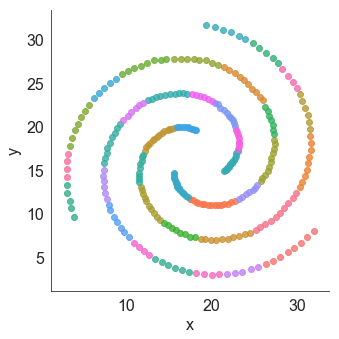

In [9]:
grid_agg = {'n_clusters':np.linspace(2, 200, 50, dtype = int),
           'linkage':['ward', 'single', 'complete', 'average']}
benchmark_agg = create_benchmark(estimator = AgglomerativeClustering, data = df, grid = grid_agg)

## DBSCAN

In [10]:
interact(plot_cluster_interactive, data = fixed(df), estimator = fixed(DBSCAN),
         eps = (1, 5), min_samples = (1, 100, 20), metric = ['manhattan','euclidean', 'cosine'])


interactive(children=(IntSlider(value=3, description='eps', max=5, min=1), IntSlider(value=41, description='mi…

<function train_benchmark.plot_cluster_interactive(data, estimator, **kwargs)>

  0%|          | 0/3 [00:00<?, ?it/s]

############### DBSCAN ###############
* New best combination of params found:
		 Silhouette Score: -0.17847229912042067
		 Min Samples: 1
		 EPS: 1
		 Metric: manhattan
* New best combination of params found:
		 Silhouette Score: 0.001344297344277985
		 Min Samples: 1
		 EPS: 2
		 Metric: manhattan
* New best combination of params found:
		 Silhouette Score: 0.19908154471950704
		 Min Samples: 6
		 EPS: 4
		 Metric: manhattan
* New best combination of params found:
		 Silhouette Score: 0.21945612081809712
		 Min Samples: 11
		 EPS: 5
		 Metric: manhattan


 33%|███▎      | 1/3 [01:48<03:37, 108.91s/it]

* New best combination of params found:
		 Silhouette Score: 0.23720821142658102
		 Min Samples: 11
		 EPS: 4
		 Metric: euclidean
* New best combination of params found:
		 Silhouette Score: 0.259818612487196
		 Min Samples: 32
		 EPS: 5
		 Metric: euclidean


100%|██████████| 3/3 [04:02<00:00, 83.81s/it] 


<Figure size 864x864 with 0 Axes>

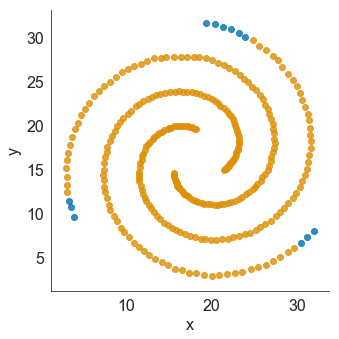

In [11]:
grid_dbscan = {'eps':np.linspace(1, 5, dtype = int),
               'min_samples':np.linspace(1,100, 20, dtype = int),
               'metric':['manhattan','euclidean', 'cosine']}
benchmark_dbscan = create_benchmark(estimator = DBSCAN, data = df, grid = grid_dbscan)

In [ ]:
#p = DBSCAN(eps = 3).fit_predict(df)
#plot_cluster(p, df)

## MeanShift

In [12]:
interact(plot_cluster_interactive, data = fixed(df), estimator = fixed(MeanShift),
         bandwidth = (1,10), cluster_all = True)


interactive(children=(IntSlider(value=5, description='bandwidth', max=10, min=1), Checkbox(value=True, descrip…

<function train_benchmark.plot_cluster_interactive(data, estimator, **kwargs)>

  0%|          | 0/2 [00:00<?, ?it/s]

############### MeanShift ###############
* New best combination of params found:
		 Silhouette Score: 0.2929820768791423
		 Bandwidth: 1
		 Cluster all: True
* New best combination of params found:
		 Silhouette Score: 0.4459200459499857
		 Bandwidth: 2
		 Cluster all: True


100%|██████████| 2/2 [01:29<00:00, 48.77s/it]


<Figure size 864x864 with 0 Axes>

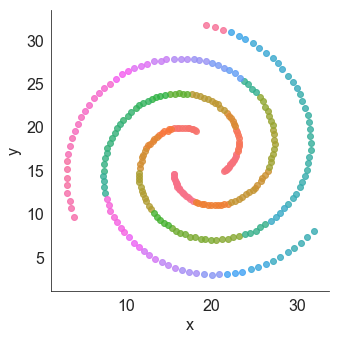

In [13]:
grid_meanshift = {'bandwidth':range(1,10,1),
                  'cluster_all':[True,False]}
                # True: Complete clustering
                # False: Partial clustering
benchmark_meanshift = create_benchmark(estimator = MeanShift, data = df, grid = grid_meanshift)

## Spectral Clustering

In [14]:
interact(plot_cluster_interactive, data = fixed(df), estimator = fixed(SpectralClustering),
         n_clusters = (1, 100, 4))


interactive(children=(IntSlider(value=49, description='n_clusters', min=1, step=4), Output()), _dom_classes=('…

<function train_benchmark.plot_cluster_interactive(data, estimator, **kwargs)>

  0%|          | 0/50 [00:00<?, ?it/s]

############### Spectral Clustering ###############


  2%|▏         | 1/50 [00:24<19:37, 24.03s/it]

* New best combination of params found:
		 Silhouette Score: 0.025327647639310412
		 Nº Clusters: 2


  4%|▍         | 2/50 [00:24<13:31, 16.91s/it]

* New best combination of params found:
		 Silhouette Score: 0.05980905512985739
		 Nº Clusters: 6


  6%|▌         | 3/50 [00:24<09:22, 11.96s/it]

* New best combination of params found:
		 Silhouette Score: 0.17704136847550206
		 Nº Clusters: 10


  8%|▊         | 4/50 [00:25<06:29,  8.46s/it]

* New best combination of params found:
		 Silhouette Score: 0.27852151141377557
		 Nº Clusters: 14


 10%|█         | 5/50 [00:25<04:31,  6.04s/it]

* New best combination of params found:
		 Silhouette Score: 0.2785366373289867
		 Nº Clusters: 18


 12%|█▏        | 6/50 [00:25<03:11,  4.35s/it]

* New best combination of params found:
		 Silhouette Score: 0.338162261232122
		 Nº Clusters: 22


 16%|█▌        | 8/50 [00:26<01:37,  2.32s/it]

* New best combination of params found:
		 Silhouette Score: 0.3827102343563972
		 Nº Clusters: 30


 18%|█▊        | 9/50 [00:27<01:12,  1.77s/it]

* New best combination of params found:
		 Silhouette Score: 0.4383105279368497
		 Nº Clusters: 34


100%|██████████| 50/50 [00:57<00:00,  1.24s/it]


<Figure size 864x864 with 0 Axes>

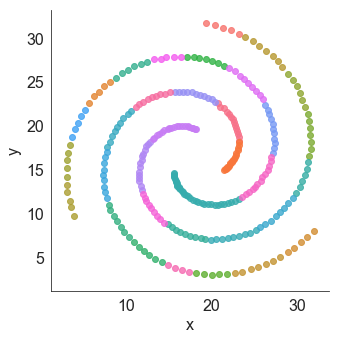

In [15]:
grid_spectral = {'n_clusters':np.linspace(2, 200, 50, dtype = int)}
benchmark_spectral = create_benchmark(estimator = SpectralClustering, data = df, grid = grid_spectral)

# Fuzzy C-Means Clustering

In [ ]:
grid_fuzzy = {'c':np.linspace(2, 200, 50, dtype = int),
              'm':range(1,5),
              'error':0.005,
              'maxiter':1000}
#create_benchmark(cmeans, df, grid_fuzzy)
cntr, u, _, _, _, _, _ = fuzz.cluster.cmeans(
    df, 3, 2, error=0.005, maxiter=1000)
cluster_membership = np.argmax(u, axis=0)
a = cmeans_predict(df, cntr, m = 3, error = 0.005, maxiter = 1000)

In [ ]:
np.array(a)[1]

----------